# Machine Learning
## Packages for the day
pip install numpy
pip install scipy
pip install scikit-learn
pip install matplotlib
pip install pandas

## Where to start?
a handy graphic for what solution may be right:
 https://scikit-learn.org/stable/tutorial/machine_learning_map/ 

In [1]:
#Our Packages
import numpy as np
import sklearn
import matplotlib
import pandas as pd

## Supervised Learning
### supervised:When you have data with 'correct' examples of what you are trying to predict

### Classification: the output is a discrete value (a 'label' eg: 'yes' vs 'no' 'red' vs 'blue' vs. 'green'


In [162]:
#Defining our Input
clinical_df = pd.read_csv('https://raw.githubusercontent.com/fredhutchio/R_intro/master/extra/clinical.csv')

#we have 20 columns, ie 19 features and 1 target to try and predict
print("Our Dataframe: {}".format(clinical_df.head()))
print("Our Dataframe: {}".format(clinical_df.describe()))

from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
enc = OneHotEncoder(handle_unknown='ignore')

#choose all rows, and all columns EXCEPT the target for data
clinical_data = clinical_df.loc[:, clinical_df.columns != 'year_of_death']
#grab only numeric data, replace NaN's with the mean of that column
numeric_clinical_data = clinical_data.select_dtypes(include=[np.number]).fillna(value=clinical_data.mean()) 
cigarettes_per_day = clinical_data.loc[:, ['cigarettes_per_day', 'years_smoked']].fillna(value=0)
#map 'year of death' to a binary 'are they dead?' feature
clinical_target = clinical_df['vital_status'].apply(lambda x: 1 if x == 'alive' else 0)
print("Our input data: {}".format(cigarettes_per_day.describe()))
print("our target data: {}".format(clinical_target.describe()))

Our Dataframe:   primary_diagnosis tumor_stage  age_at_diagnosis vital_status morphology  \
0             C34.1    stage ia           24477.0         dead     8070/3   
1             C34.1    stage ib           26615.0         dead     8070/3   
2             C34.3    stage ib           28171.0         dead     8070/3   
3             C34.1    stage ia           27154.0        alive     8083/3   
4             C34.3   stage iib           29827.0         dead     8070/3   

   days_to_death state tissue_or_organ_of_origin  days_to_birth  \
0          371.0  live                     C34.1       -24477.0   
1          136.0  live                     C34.1       -26615.0   
2         2304.0  live                     C34.3       -28171.0   
3            NaN  live                     C34.1       -27154.0   
4          146.0  live                     C34.3       -29827.0   

  site_of_resection_or_biopsy  days_to_last_follow_up  cigarettes_per_day  \
0                       C34.1             

In [158]:
clinical_df.head()

,primary_diagnosis,tumor_stage,age_at_diagnosis,vital_status,morphology,days_to_death,state,tissue_or_organ_of_origin,days_to_birth,site_of_resection_or_biopsy,days_to_last_follow_up,cigarettes_per_day,years_smoked,gender,year_of_birth,race,ethnicity,year_of_death,bcr_patient_barcode,disease
0,C34.1,stage ia,24477.0,dead,8070/3,371.0,live,C34.1,-24477.0,C34.1,NaN,10.958904,NaN,male,1936.0,white,not hispanic or latino,2004.0,TCGA-18-3406,LUSC
1,C34.1,stage ib,26615.0,dead,8070/3,136.0,live,C34.1,-26615.0,C34.1,NaN,2.191781,NaN,male,1931.0,asian,not hispanic or latino,2003.0,TCGA-18-3407,LUSC
2,C34.3,stage ib,28171.0,dead,8070/3,2304.0,live,C34.3,-28171.0,C34.3,2099.0,1.643836,NaN,female,1927.0,white,not hispanic or latino,NaN,TCGA-18-3408,LUSC
3,C34.1,stage ia,27154.0,alive,8083/3,NaN,live,C34.1,-27154.0,C34.1,3747.0,1.095890,NaN,male,1930.0,white,not hispanic or latino,NaN,TCGA-18-3409,LUSC
4,C34.3,stage iib,29827.0,dead,8070/3,146.0,live,C34.3,-29827.0,C34.3,NaN,NaN,NaN,male,1923.0,not reported,not reported,2004.0,TCGA-18-3410,LUSC


In [163]:
from sklearn.model_selection import train_test_split

#split our data into a TRAINING (make the model) and TESTING (evaluate how good the model is) set
X_train, X_test, y_train, y_test = train_test_split(cigarettes_per_day,
                                                    clinical_target,
                                                    test_size=0.2,
                                                    random_state=42)



In [164]:
#Define and train a model
import sklearn.svm as svm
'''
a Linear classifier, based on the fairly popular 'Support Vector Machine' family
read about them at: https://en.wikipedia.org/wiki/Support-vector_machine
and the kernel trick: https://en.wikipedia.org/wiki/Support-vector_machine#Kernel_trick
This is useful when we have primarily numeric information that we're trying to deal with.
That isn't to say that you cannot use it if you have some sort of categorical information; 
    you just have to convert it to a format that is.


for our purposes, it is enough to say that the kernel trick is a way to map a set of variables 
to another space where *hopefully* it is more easily separable
for example mapping x,y (2-D) coordinates to a 3-D space where we can draw our line through it for classification:
  https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:Kernel_trick_idea.svg
  

'''

linear_classifier = svm.SVC(kernel='linear', C=1.0)
linear_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [165]:
#Evaluate our model

#get the predictions from our model
y_pred = linear_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Number of mislabeled points out of a total %d points : %d" % (y_test.shape[0],(y_test != y_pred).sum()))
confusion_matrix(y_test, y_pred)


Number of mislabeled points out of a total 1367 points : 449


array([[  0, 449],
       [  0, 918]])

### Metrics
We chose as our metric 'absolute accuracy' How good of a metric is this?
When we look at the confusion matrix, what do we see that stands out as strange?

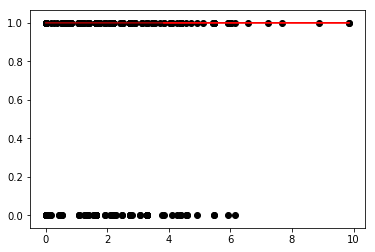

In [155]:
#make the plot
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(X_test.cigarettes_per_day, y_test, color='black')
plt.plot(X_test.cigarettes_per_day, y_pred, color='red', linewidth=1)
plt.show()

## What Happened?
### Our Model learned that, since most patients are alive (ie: label = 1) the best prediction is always that the patient is alive.
### What other evaluation metrics could we use instead?


### You may have noticed that there is more work done to prepare the data
### (choose only numeric info, fill missing information, map our target variable to a '1, 0' variable
### And that was only with a subset of the information available!

# The Moral of the Story
## Machine Learning is as good as the data you have, and the overwhelming amount of time spent will be in preparing, imputing and otherwise understanding the data that you have available.

### Some nice data that behaves well: the Iris dataset

In [143]:
import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

#using only petal length and width
iris_X = iris.data[:, 2:]
iris_y = iris.target
target_names = iris.target_names

In [144]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X,
                                                                        iris_y,
                                                                        test_size=0.3,
                                                                        random_state=42)

In [152]:
linear_classifier = svm.SVC(kernel='linear', C=1.0)
linear_classifier.fit(iris_X_train, target_names[iris_y_train])

print(iris_X)

[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.7  0.4]
 [ 1.4  0.3]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.5  0.2]
 [ 1.6  0.2]
 [ 1.4  0.1]
 [ 1.1  0.1]
 [ 1.2  0.2]
 [ 1.5  0.4]
 [ 1.3  0.4]
 [ 1.4  0.3]
 [ 1.7  0.3]
 [ 1.5  0.3]
 [ 1.7  0.2]
 [ 1.5  0.4]
 [ 1.   0.2]
 [ 1.7  0.5]
 [ 1.9  0.2]
 [ 1.6  0.2]
 [ 1.6  0.4]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.6  0.2]
 [ 1.6  0.2]
 [ 1.5  0.4]
 [ 1.5  0.1]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.2  0.2]
 [ 1.3  0.2]
 [ 1.5  0.1]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.3  0.3]
 [ 1.3  0.3]
 [ 1.3  0.2]
 [ 1.6  0.6]
 [ 1.9  0.4]
 [ 1.4  0.3]
 [ 1.6  0.2]
 [ 1.4  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 4.7  1.4]
 [ 4.5  1.5]
 [ 4.9  1.5]
 [ 4.   1.3]
 [ 4.6  1.5]
 [ 4.5  1.3]
 [ 4.7  1.6]
 [ 3.3  1. ]
 [ 4.6  1.3]
 [ 3.9  1.4]
 [ 3.5  1. ]
 [ 4.2  1.5]
 [ 4.   1. ]
 [ 4.7  1.4]
 [ 3.6  1.3]
 [ 4.4  1.4]
 [ 4.5  1.5]
 [ 4.1  1. ]
 [ 4.5  1.5]
 [ 3.9  1.1]
 [ 4.8  1.8]
 [ 4.   1.3]
 [ 4.9  1.5]
 [ 4.7  1.2]
 [ 4.3  1.3]
 [ 4.4  1.4]
 [ 4.8  1.4]

In [146]:
# Make predictions using the testing set
iris_y_pred = linear_classifier.predict(iris_X_test)

print("our accuracy: {}".format(accuracy_score(iris_y_pred, target_names[iris_y_test])))
print(confusion_matrix(target_names[iris_y_test], iris_y_pred, labels=target_names))


our accuracy: 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Why does this do so much better?

<Figure size 432x288 with 0 Axes>

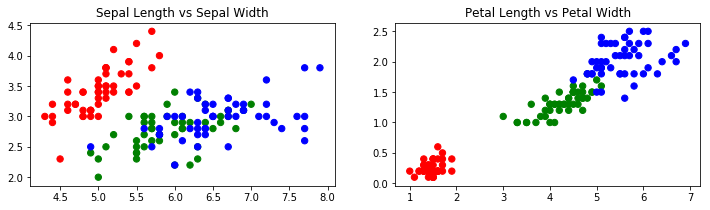

In [154]:
plt.clf()
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=colors[iris_y], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c= colors[iris_y], s=40)
plt.title('Petal Length vs Petal Width')
plt.show()

### Petal Length + Width have very clear groupings, and therefore is a much easier prediction problem!